# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
heroes_df.head()
#powers_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [3]:
heroes_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [4]:
#heroes_df.Publisher.value_counts()
for n in range(0, len(heroes_df.columns)):
    print(heroes_df[heroes_df.columns[n]].value_counts())

# heroes_df Missing Values
# Encoding: 
# Gender: - ; Eye Color: - ; Race: - (Majority); Hair Color: - (majority); Height: -99 (majority); 
# Skin color: - (over 90%); ALignment: - (<1%); Weight: -99 (large majority)

# powers_df Missing Values: none?

Spider-Man          3
Goliath             3
Batman              2
Vindicator          2
Batgirl             2
Toxin               2
Black Canary        2
Namor               2
Atlas               2
Blue Beetle         2
Angel               2
Firestorm           2
Blizzard            2
Captain Marvel      2
Speedy              2
Nova                2
Atom                2
Cyborg Superman     1
Nebula              1
Chromos             1
Hawk                1
Exodus              1
Venom III           1
Demogoblin          1
Billy Kincaid       1
Hellstorm           1
Walrus              1
Steel               1
Violator            1
Aquababy            1
                   ..
Living Tribunal     1
Shrinking Violet    1
Junkpile            1
Clea                1
Predator            1
Doctor Fate         1
JJ Powell           1
Stargirl            1
Bolt                1
Abe Sapien          1
Magog               1
Harry Potter        1
Doc Samson          1
Angel Dust          1
Man-Wolf  

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

powers_df had no null values

heroes_df had `-` as null for categorical values and `-99` as null for numerical values (e.g., Height, Weight). Categorical null was replaced with `NaN` and numerical null was replaced with the median of the column.

King Kong had a weight of `NaN` and his actual weight is 20-60 tons, which would be a far outlier. So, `NaN` was kept and in data viz/processing of weights, King Kong is excluded



In [5]:
heroes_df.columns.str.replace(' ', '_')
# Address everything but height and weight
heroes_df.replace('-', 'NaN', inplace= True)

In [6]:
# Replaceing Height null value with median height
heroes_df.Height.replace(-99.0,heroes_df.Height.median(), inplace= True)
#heroes_df.Height.value_counts()


In [7]:
# Replaceing Weight null value with median weight
heroes_df.Weight.replace(-99.0,heroes_df.Weight.median(), inplace= True)


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [8]:
heroes_df.set_index('name', inplace=True)
powers_df.set_index('hero_names', inplace=True)
hero_powers = heroes_df.join(powers_df, how = 'inner')
hero_powers.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,NaN,bad,62.0,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Inner join along matching indices. `powers_df` has more rows than the joined matrix; heroes_df has more rows than powers_df
len(powers_df) > len(hero_powers)
len(powers_df) < len(heroes_df)

True

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [10]:
m_heroes = hero_powers[hero_powers['Gender']== 'Male']
#m_heroes.head()
f_heroes = hero_powers[hero_powers['Gender']== 'Female']
#f_heroes.head()

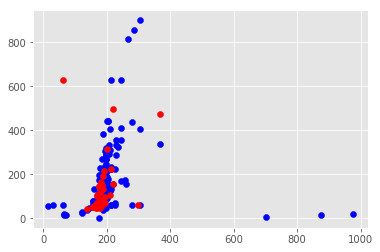

In [11]:
# Graphs
plt.scatter(m_heroes.Height,m_heroes.Weight, c = 'blue')
plt.scatter(f_heroes.Height,f_heroes.Weight, c = 'red')
plt.show()

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [12]:
male_heroes_df = m_heroes
female_heroes_df = f_heroes

def show_distplot(dataframe, gender, column_name):
    sns.distplot(dataframe.column_name)
    plt.tight_layout
    pass

In [13]:
# Male Height
m_height = male_heroes_df.Height

#fig = plt.figure()
#ax1 = fig.add_subplot(2,2,1)
#ax1 = sns.distplot(m_height, axlabel= 'm_height')


In [14]:
# Male Weight

m_weight = male_heroes_df.Weight
#ax2 = fig.add_subplot(2,2,2)
#ax2 = sns.distplot(m_weight[m_weight.notna()], axlabel= 'm_weight')
#fig

In [15]:
# Female Height
f_height = female_heroes_df.Height
#ax3 = fig.add_subplot(2,2,3)
#ax3 = sns.distplot(f_height, axlabel= 'f_height')
#fig

In [16]:
# Female Weight
f_weight = female_heroes_df.Weight
#ax[1,1] = sns.distplot(f_weight, axlabel= 'f_weight')
#fig

print(m_weight.describe(), m_height.describe(), f_weight.describe(), f_height.describe())

count    463.000000
mean     107.276458
std       98.896975
min        2.000000
25%       62.000000
50%       79.000000
75%      101.000000
max      900.000000
Name: Weight, dtype: float64 count    464.000000
mean     187.946121
std       60.662029
min       15.200000
25%      175.000000
50%      183.000000
75%      188.000000
max      975.000000
Name: Height, dtype: float64 count    178.000000
mean      75.544944
std       69.006515
min       41.000000
25%       54.000000
50%       61.000000
75%       62.000000
max      630.000000
Name: Weight, dtype: float64 count    178.000000
mean     174.806180
std       21.283341
min       62.500000
25%      168.000000
50%      175.000000
75%      175.000000
max      366.000000
Name: Height, dtype: float64


C:\Users\Mike\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

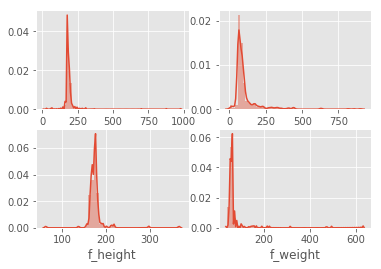

In [17]:
fig, axes = plt.subplots(2, 2)
sns.distplot(m_height, axlabel= 'm_height', ax=axes[0,0])
sns.distplot(m_weight[m_weight.notna()], axlabel= 'm_weight', ax=axes[0,1])
sns.distplot(f_height, axlabel= 'f_height', ax=axes[1,0])
sns.distplot(f_weight, axlabel= 'f_weight', ax=axes[1,1])
plt.tight_layout

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________


Male superheroes had a greater mean, median, and more height and weight than female superheroes.


In [18]:
# Summary info
print("Male Weight",'\n','Mean:', '%.0f' % m_weight.mean(), '\n', 'Median:', m_weight.median(), '\n', 'Mode:', max(m_weight.mode()), '\n', "Right skewed", '\n')
print("Male Height",'\n','Mean:', '%.0f' % m_height.mean(), '\n', 'Median:', m_height.median(), '\n', 'Mode:', max(m_height.mode()), '\n', "Left skewed", '\n')
print("Female Weight",'\n','Mean:', '%.0f' % f_weight.mean(), '\n', 'Median:', f_weight.median(), '\n', 'Mode:', max(f_weight.mode()), '\n', "Left skewed", '\n')
print("Female Height",'\n','Mean:', '%.0f' % f_height.mean(), '\n', 'Median:', f_height.median(), '\n', 'Mode:', max(f_height.mode()), '\n', "Left skewed", '\n')

Male Weight 
 Mean: 107 
 Median: 79.0 
 Mode: 62.0 
 Right skewed 

Male Height 
 Mean: 188 
 Median: 183.0 
 Mode: 175.0 
 Left skewed 

Female Weight 
 Mean: 76 
 Median: 61.0 
 Mode: 62.0 
 Left skewed 

Female Height 
 Mean: 175 
 Median: 175.0 
 Mode: 175.0 
 Left skewed 



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [19]:
# Most Common Powers
df1 = pd.DataFrame(powers_df.sum())
df1.columns = ['col1']
top_pow = df1.sort_values(by = ['col1'], ascending = False) #drop_duplicates(subset = 'col1').
print("5 most common powers overall are", list(top_pow.index[:5]))


5 most common powers overall are ['Super Strength', 'Stamina', 'Durability', 'Super Speed', 'Agility']


In [20]:
# 5 Most Common in Marvel Universe
marvel_power = hero_powers[hero_powers['Publisher']=="Marvel Comics"]
marvel_top_pow = pd.DataFrame(marvel_power.loc[:,'Agility':].sum())
marvel_top_pow.columns = ['col1']
marvel_top_pow = marvel_top_pow.sort_values(by = ['col1'], ascending = False) #drop_duplicates(subset = 'col1').
print("5 most common powers in the Marvel Universe are", list(marvel_top_pow.index[:5]))


5 most common powers in the Marvel Universe are ['Super Strength', 'Durability', 'Stamina', 'Super Speed', 'Agility']


In [21]:
# 5 Most Common in DC Universe
DC_power = hero_powers[hero_powers['Publisher']=="DC Comics"]
DC_top_pow = pd.DataFrame(DC_power.loc[:,'Agility':].sum())
DC_top_pow.columns = ['col1']
DC_top_pow = DC_top_pow.sort_values(by = ['col1'], ascending = False) #drop_duplicates(subset = 'col1').
print("5 most common powers in the DC Universe are", list(DC_top_pow.index[:5]))


5 most common powers in the DC Universe are ['Super Strength', 'Stamina', 'Flight', 'Super Speed', 'Durability']


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________

Top 5 overall powers and Top 5 Marvel powers are identical- but in different order. DC Universe has 4 shared powers, but  Flight was 3rd, kicking Agility out of the Top 5.


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?

Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [22]:
# Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
multi_power= powers_df[powers_df.sum(axis = 1)>1]

In [23]:
pow_cor = pd.DataFrame(multi_power.corr())
pow_cor_up = pow_cor.where(np.triu(np.ones(pow_cor.shape), k=1).astype(np.bool))
pow_cor_up = pow_cor_up.stack().sort_values(ascending = False)
pow_cor_up_df = pd.DataFrame(pow_cor_up)
print("Top 10 pairs of powers most likely to be in combination across all superheroes:", "\n", list(pow_cor_up_df.index)[:10])

Top 10 pairs of powers most likely to be in combination across all superheroes: 
 [('Omnipresent', 'Omniscient'), ('Hyperkinesis', 'Spatial Awareness'), ('Intuitive aptitude', 'Melting'), ('Vision - Heat', 'Vision - X-Ray'), ('Vision - Microscopic', 'Vision - X-Ray'), ('Vision - Microscopic', 'Vision - Heat'), ('Radiation Control', 'Radiation Absorption'), ('Super Breath', 'Vision - Heat'), ('Vision - Microscopic', 'Super Breath'), ('Time Travel', 'Time Manipulation')]


In [24]:
# Gender-based Powers Distributions
mal_cor = hero_powers[hero_powers.Gender=='Male'].iloc[:,9:len(hero_powers.columns)]
mal_cor = pd.DataFrame(mal_cor.corr())
mal_cor_up = mal_cor.where(np.triu(np.ones(mal_cor.shape), k=1).astype(np.bool))
mal_cor_up = mal_cor_up.stack().sort_values(ascending = False)
mal_cor_up_df = pd.DataFrame(mal_cor_up)
print("Top 10 pairs of powers most likely to be in combination for male superheroes:", "\n", list(mal_cor_up_df.index)[:10])

Top 10 pairs of powers most likely to be in combination for male superheroes: 
 [('Hyperkinesis', 'Spatial Awareness'), ('Intuitive aptitude', 'Melting'), ('Power Sense', 'Projection'), ('Molecular Combustion', 'Vitakinesis'), ('Vision - Microscopic', 'Vision - X-Ray'), ('Web Creation', 'Symbiote Costume'), ('Vision - Heat', 'Vision - X-Ray'), ('Vision - Microscopic', 'Vision - Heat'), ('Weather Control', 'Odin Force'), ('Super Breath', 'Vision - Heat')]


In [25]:
# Gender-based Powers Distributions
femal_cor = hero_powers[hero_powers.Gender=='Female'].iloc[:,9:len(hero_powers.columns)]
femal_cor = pd.DataFrame(femal_cor.corr())
femal_cor_up = femal_cor.where(np.triu(np.ones(femal_cor.shape), k=1).astype(np.bool))
femal_cor_up = femal_cor_up.stack().sort_values(ascending = False)
femal_cor_up_df = pd.DataFrame(femal_cor_up)
print("Top 10 pairs of powers most likely to be in combination for female superheroes:", "\n", list(femal_cor_up_df.index)[:10])

Top 10 pairs of powers most likely to be in combination for female superheroes: 
 [('Dimensional Awareness', 'Reality Warping'), ('Illumination', 'Molecular Combustion'), ('Vision - Infrared', 'Vision - Thermal'), ('Vision - Telescopic', 'Vision - Microscopic'), ('Resurrection', 'Phoenix Force'), ('Power Augmentation', 'Power Sense'), ('Terrakinesis', 'Weather Control'), ('Underwater breathing', 'Sub-Mariner'), ('Dimensional Travel', 'Sub-Mariner'), ('Super Breath', 'Vision - Heat')]


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

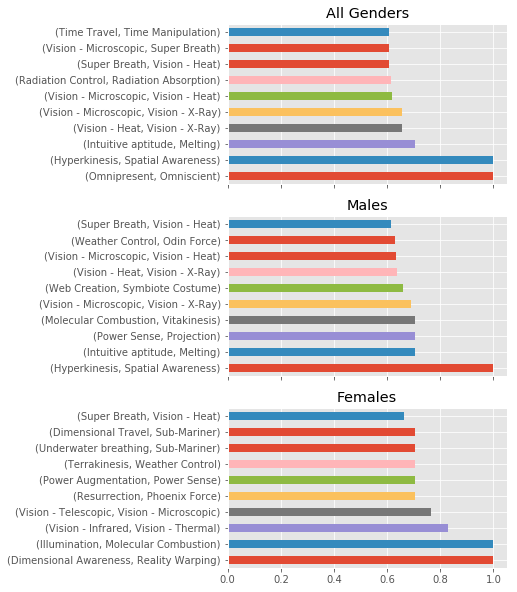

In [26]:
fig2, (ax_a, ax_m, ax_f) = plt.subplots(3, 1, sharex= True, figsize = [5,10])

pow_cor_up[:10].plot(kind='barh', ax = ax_a)
mal_cor_up[:10].plot(kind='barh', ax = ax_m)
femal_cor_up[:10].plot(kind='barh', ax = ax_f)

ax_a.set_title('All Genders')
ax_m.set_title('Males')
ax_f.set_title('Females')

plt.tight_layout

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data